
# Assignment #2

### Redes de 1 camada oculta

Pedro Stramantinoli P. Cagliume Gomes 175955

Ruy Castilho Barrichelo 177012


## Importação dos Dados

In [1]:
import pandas as pd
import os

def load_fashionMNIST_train():
    csv_path = os.path.join("Data/fashion-mnist-dataset", "fashion-mnist_train.csv")
    return pd.read_csv(csv_path)

def load_fashionMNIST_tests():
    csv_path = os.path.join("Data/fashion-mnist-dataset", "fashion-mnist_test.csv")
    return pd.read_csv(csv_path)

## Feature Scalling e Normalização

In [2]:
import numpy as np

def normalize(train, test):
    train_mean = np.mean(train, axis=0)
    train = train - train_mean
    test = test - train_mean
    
    return train, test

def scale(X):
    max_array = np.max(X, axis=0)
    X = X / max_array[None, :]
    return X

## Geração de matrizes de Features e Target

### Setup inicial dos dados

In [3]:
import numpy as np

#carrega os dados
data_train = load_fashionMNIST_train()
data_test = load_fashionMNIST_tests()

# Separação em Features e Target

data_train_target = np.array(data_train["label"])
data_test_target = np.array(data_test["label"])

data_train = np.array(data_train)
data_test = np.array(data_test)

data_train = np.delete(data_train, 0, axis=1)
data_test = np.delete(data_test, 0, axis=1)

# Normalização
normalized_data_train, normalized_data_test = normalize(data_train,data_test)

# Scaling
scaled_data_train = scale(normalized_data_train)
scaled_data_test = scale(normalized_data_test)

def getTrainSet():
    return scaled_data_train, data_train_target

def getTestSet():
    return scaled_data_test,data_test_target

## Gerador de conjuntos de Cross Validation

In [4]:
# Cross Validation Generation 

from sklearn.model_selection import train_test_split, KFold

# Retorna um gerador de indices
def generate_sets(TRAINING_DATA,type='kfold'):

    # Cross validation using train_test_split
    if (type == 'split'):
       return train_test_split(TRAINING_DATA,test_size=0.2,random_state=0)

    # Cross validation using K-Fold
    # K = 5, Shuffle = true, Seed = 21
    elif (type == 'kfold'):
        kfold_seed = 21

        kfold = KFold(n_splits=5, shuffle=True, random_state=kfold_seed)
        return kfold.split(TRAINING_DATA)

## Units per Layer

In [5]:
input_layer=784 
units_per_hidden_layer=500
output_layer=10

## Learning Rate

In [24]:
learning_rate = 0.001

## Number of Epochs

In [25]:
epochs=5
epochs_for_overfit_test=30

## Batch Size

In [8]:
batch_size=512

## Weights and Bias

In [9]:
# Initializes weights randomly

import numpy as np

np.random.seed(21)

def weights1():
    return np.random.rand(input_layer, units_per_hidden_layer)*0.01

def weights2():
    return np.random.rand(units_per_hidden_layer, output_layer)*0.01
    
     
# Adds biases, initialized with zeros

def bias1():
    return np.zeros((1, units_per_hidden_layer))

def bias2():
    return np.zeros((1, output_layer))

def setupNN():
    return weights1(), bias1(), weights2(), bias2()

## Activation Functions

### Sigmoid and Loss functions

In [10]:
import numpy as np

def sigmoid(z):
    return 1 / (1+np.exp(-z))

def sigmoid_derivative(a):
    return a*(1 - a)

def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


### ReLU

In [11]:
import numpy as np

def ReLU(z):
    z[z<0]=0
    return z

def ReLU_derivative(z):
    z = np.where(z >= 0, 1, 0)
    return z

### Leaky ReLU

In [12]:
import numpy as np

def leaky_ReLU(z):
    z = np.where(z > 0, z, z * 0.01)
    return z

def leaky_ReLU_derivative(z):
    z = np.where(z >= 0, 1, 0.01)
    return z

### Tanh

In [13]:
import numpy as np

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    tan = tanh(z)
    return (1-np.square(tan))

## Softmax

In [14]:
import numpy as np

# Stable softmax
def softmax(z):
    expZ = np.exp(z - np.max(z))
    return expZ / np.sum(expZ, axis=1, keepdims=True)


## Loss Function - Cross Entropy with Softmax

In [15]:
def cross_entropy_loss(delta, y, length):
    delta[range(length), y] -= 1
    return delta

## Success/Error Percentages

In [16]:
import numpy as np

def error_rate(prediction, y):
    return np.mean( prediction != y )

def success_rate(prediction, y):
    return np.mean( prediction == y )


# Models

#### Different activation functions for hidden layers, but all of them end with the use of Softmax

## Sigmoid

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid_model(completeX, completeY, x1_val, y1_val, epochs=epochs, shouldPlot=False):

    W1, B1, W2, B2 = setupNN()
    plot_test_sigmoid = []
    plot_val_sigmoid = []
    
    parameters = {}
    for k in range(0, epochs):
        print('Epoch: ', k+1)

        for j in range(0, int(completeX.shape[0]/batch_size)):
            X = completeX[batch_size*j:batch_size*(j+1)]
            y = completeY[batch_size*j:batch_size*(j+1)]

            # Forward propagation

            z1 = np.dot(X, W1) + B1

            a1 = sigmoid(z1)

            z2 = np.dot(a1, W2) + B2

            # Hypothesis
            a2 = softmax(z2)

            # Back propagation
            delta3 = cross_entropy_loss(a2, y, len(X))

            dW2 = np.dot(np.transpose(a1), delta3)
            dB2 = np.sum(delta3, axis=0, keepdims=True)
            dot = np.dot(delta3, np.transpose(W2))
            deriv = sigmoid_derivative(a1)
            delta2 = np.multiply(dot, deriv)

            dW1 = np.dot(np.transpose(X), delta2)
            dB1 = np.sum(delta2, axis=0, keepdims=True)

            # Updating parameters

            W1 += -learning_rate * dW1
            B1 += -learning_rate * dB1
            W2 += -learning_rate * dW2
            B2 += -learning_rate * dB2

            parameters = {'W1': W1, 'B1': B1, 'W2': W2, 'B2': B2}
            
        X = completeX[batch_size*j:]
        y = completeY[batch_size*j:]

        # Forward propagation

        z1 = np.dot(X, W1) + B1

        a1 = sigmoid(z1)

        z2 = np.dot(a1, W2) + B2

        # Hypothesis
        a2 = softmax(z2)

        # Back propagation
        delta3 = cross_entropy_loss(a2, y, len(X))

        dW2 = np.dot(np.transpose(a1), delta3)
        dB2 = np.sum(delta3, axis=0, keepdims=True)
        dot = np.dot(delta3, np.transpose(W2))
        deriv = sigmoid_derivative(a1)
        delta2 = np.multiply(dot, deriv)

        dW1 = np.dot(np.transpose(X), delta2)
        dB1 = np.sum(delta2, axis=0, keepdims=True)

        # Updating parameters

        W1 += -learning_rate * dW1
        B1 += -learning_rate * dB1
        W2 += -learning_rate * dW2
        B2 += -learning_rate * dB2

        parameters = {'W1': W1, 'B1': B1, 'W2': W2, 'B2': B2}
        
        if (shouldPlot):

            prediction_test_sigmoid = sigmoid_prediction(parameters, completeX)
            prediction_val_sigmoid = sigmoid_prediction(parameters, x1_val)

            error_sigmoid_test = error_rate(prediction_test_sigmoid, completeY)
            error_sigmoid_val = error_rate(prediction_val_sigmoid, y1_val)

            plot_test_sigmoid.append(error_sigmoid_test*100)
            plot_val_sigmoid.append(error_sigmoid_val*100)
        
    if (shouldPlot):

        # print(plot_test_sigmoid)
        plt.plot(range(1, epochs+1) ,plot_test_sigmoid, linestyle='-.', color='dodgerblue')
        plt.plot(range(1, epochs+1), plot_val_sigmoid, linestyle='-', color='darkorange')
        plt.ylabel('Error Percentage - Sigmoid I')
        plt.xlabel('Epochs')
        plt.axis([1,epochs+1,0,100])
        plt.savefig('sigmoid_1_error.png', bbox_inches='tight')
        plt.show()

    return parameters

def sigmoid_prediction(parameters, X):
    W1, B1, W2, B2 = parameters['W1'], parameters['B1'], parameters['W2'], parameters['B2']

    z1 = np.dot(X, W1) + B1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + B2
    a2 = softmax(z2)
    
    return np.argmax(a2, axis=1)

Testing overfitting for 3-layer sigmoid
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30


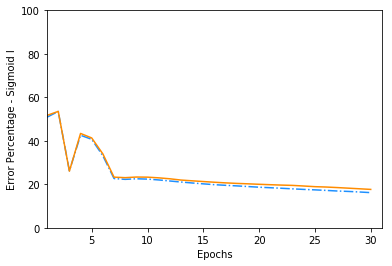

Success rate of the overfit test for Sigmoid is:  0.8234166666666667


In [31]:
# Testing for overfitting

X1, y1 = getTrainSet()
indices_generator = generate_sets(X1)

for train_index, val_index in indices_generator:
    print('Testing overfitting for 3-layer sigmoid')
    x1_train = X1[train_index]
    y1_train = y1[train_index]
    x1_val = X1[val_index]
    y1_val = y1[val_index]
     
    parameters_sigmoid = sigmoid_model(x1_train, y1_train, x1_val, y1_val, epochs_for_overfit_test, shouldPlot=True)
    
    y1_predict = sigmoid_prediction(parameters_sigmoid, x1_val)
    success_sigmoid = success_rate(y1_predict, y1_val)
    print('Success rate of the overfit test for Sigmoid is: ', success_sigmoid)
    break


In [ ]:
X1, y1 = getTrainSet()
indices_generator = generate_sets(X1)
model_list_sigmoid = []
result_list_sigmoid = []

i=0
for train_index, val_index in indices_generator:
    print("K=",i+1)
    x1_train = X1[train_index]
    y1_train = y1[train_index]
    x1_val = X1[val_index]
    y1_val = y1[val_index]
     
    parameters_sigmoid = sigmoid_model(x1_train, y1_train, x1_val, y1_val)
    model_list_sigmoid.append(parameters_sigmoid)
    
    y1_predict = sigmoid_prediction(parameters_sigmoid, x1_val)
    success_sigmoid = success_rate(y1_predict, y1_val)
    result_list_sigmoid.append(success_sigmoid)
    
    i += 1

for i in range(0, len(result_list_sigmoid)):
    print('Success rate for set', i, ' is: ', result_list_sigmoid[i])

## ReLU

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def relu_model(completeX, completeY, x2_val, y2_val, epochs=epochs, shouldPlot=False):

    W1, B1, W2, B2 = setupNN()
    plot_test_relu = []
    plot_val_relu = []
    
    parameters = {}

    for k in range(0, epochs):
        print('Epoch: ', k+1)

        for j in range(0, int(completeX.shape[0]/batch_size)):
            X = completeX[batch_size*j:batch_size*(j+1)]
            y = completeY[batch_size*j:batch_size*(j+1)]

            # Forward propagation

            z1 = np.dot(X, W1) + B1

            a1 = ReLU(z1)
            
            z2 = np.dot(a1, W2) + B2

            # Hypothesis
            a2 = softmax(z2)

            # Back propagation
            delta3 = cross_entropy_loss(a2, y, len(X))

            dW2 = np.dot(np.transpose(a1), delta3)
            dB2 = np.sum(delta3, axis=0, keepdims=True)
            dot = np.dot(delta3, np.transpose(W2))
            deriv = ReLU_derivative(z1)
            delta2 = np.multiply(dot, deriv)

            dW1 = np.dot(np.transpose(X), delta2)
            dB1 = np.sum(delta2, axis=0, keepdims=True)

            # Updating parameters

            W1 += -learning_rate * dW1
            B1 += -learning_rate * dB1
            W2 += -learning_rate * dW2
            B2 += -learning_rate * dB2

            parameters = {'W1': W1, 'B1': B1, 'W2': W2, 'B2': B2}

        X = completeX[batch_size*j:]
        y = completeY[batch_size*j:]

        # Forward propagation

        z1 = np.dot(X, W1) + B1

        a1 = ReLU(z1)

        z2 = np.dot(a1, W2) + B2

        # Hypothesis
        a2 = softmax(z2)

        # Back propagation
        delta3 = cross_entropy_loss(a2, y, len(X))

        dW2 = np.dot(np.transpose(a1), delta3)
        dB2 = np.sum(delta3, axis=0, keepdims=True)
        dot = np.dot(delta3, np.transpose(W2))
        deriv = ReLU_derivative(z1)
        delta2 = np.multiply(dot, deriv)

        dW1 = np.dot(np.transpose(X), delta2)
        dB1 = np.sum(delta2, axis=0, keepdims=True)

        # Updating parameters

        W1 += -learning_rate * dW1
        B1 += -learning_rate * dB1
        W2 += -learning_rate * dW2
        B2 += -learning_rate * dB2

        parameters = {'W1': W1, 'B1': B1, 'W2': W2, 'B2': B2}

        if (shouldPlot):

            prediction_test_relu = relu_prediction(parameters, completeX)
            prediction_val_relu = relu_prediction(parameters, x2_val)

            error_relu_test = error_rate(prediction_test_relu, completeY)
            error_relu_val = error_rate(prediction_val_relu, y2_val)

            plot_test_relu.append(error_relu_test*100)
            plot_val_relu.append(error_relu_val*100)

    if (shouldPlot):
        # print(plot_test_relu)
        plt.plot(range(1, epochs+1) ,plot_test_relu)
        plt.plot(range(1, epochs+1), plot_val_relu)
        plt.ylabel('Error Percentage - ReLU I')
        plt.xlabel('Epochs')
        plt.axis([1,epochs+1,0,100])
        plt.savefig('relu_1_error.png', bbox_inches='tight')
        plt.show()

    return parameters

def relu_prediction(parameters, X):
    W1, B1, W2, B2 = parameters['W1'], parameters['B1'], parameters['W2'], parameters['B2']

    z1 = np.dot(X, W1) + B1
    a1 = ReLU(z1)
    z2 = np.dot(a1, W2) + B2
    a2 = softmax(z2)
    
    return np.argmax(a2, axis=1)

In [ ]:
# Testing for overfitting

X2, y2 = getTrainSet()
indices_generator = generate_sets(X2)

for train_index, val_index in indices_generator:
    print('Testing overfitting for 3-layer ReLU')
    x2_train = X2[train_index]
    y2_train = y2[train_index]
    x2_val = X2[val_index]
    y2_val = y2[val_index]
     
    parameters = relu_model(x2_train, y2_train, x2_val, y2_val, epochs_for_overfit_test, shouldPlot=True)
    
    y2_predict = relu_prediction(parameters, x2_val)
    success_relu = success_rate(y2_predict, y2_val)
    print('Success rate of the overfit test for ReLU is: ', success_relu)


Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
[54.8875, 39.368750000000006, 31.02916666666667, 26.17083333333333, 24.29375]


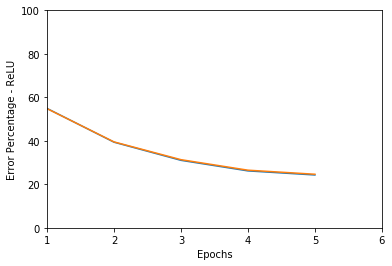

Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
[53.78958333333333, 42.229166666666664, 32.71041666666667, 27.09375, 24.95625]


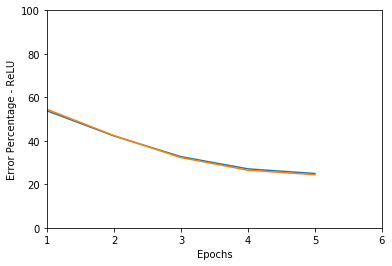

Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
[50.556250000000006, 39.72291666666667, 31.23125, 27.197916666666664, 25.345833333333335]


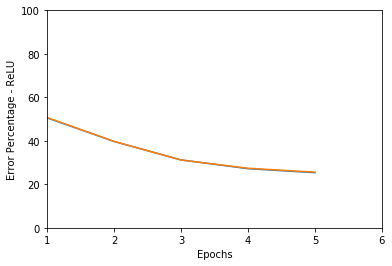

Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
[52.822916666666664, 38.666666666666664, 31.874999999999996, 27.272916666666667, 25.13958333333333]


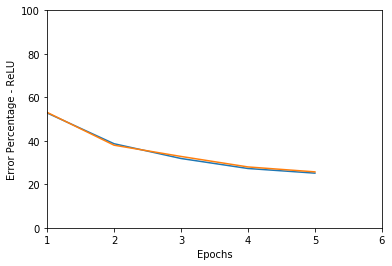

Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
[50.89583333333333, 43.97083333333333, 32.53958333333333, 27.48541666666667, 25.4375]


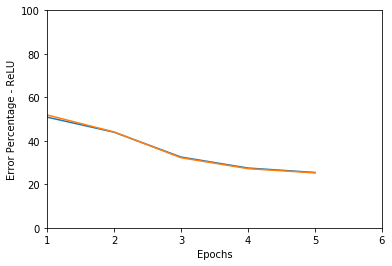

NameError: name 'result_list' is not defined

In [18]:
X2, y2 = getTrainSet()
indices_generator = generate_sets(X2)
model_list_relu = []
result_list_relu = []

i=0
for train_index, val_index in indices_generator:
    print("K=",i+1)
    x2_train = X2[train_index]
    y2_train = y2[train_index]
    x2_val = X2[val_index]
    y2_val = y2[val_index]
     
    parameters = relu_model(x2_train, y2_train, x2_val, y2_val)
    model_list_relu.append(parameters)
    
    y2_predict = relu_prediction(parameters, x2_val)
    success_relu = success_rate(y2_predict, y2_val)
    result_list_relu.append(success_relu)
    
    i += 1

for i in range(0, len(result_list)):
    print('Success rate for set', i, ' is: ', result_list[i])

## Leaky ReLU

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_relu_model(completeX, completeY, x3_val, y3_val, epochs=epochs, shouldPlot=False):

    W1, B1, W2, B2 = setupNN()
    plot_test_leaky = []
    plot_val_leaky = []
    
    parameters = {}

    for k in range(0, epochs):
        print('Epoch: ', k+1)

        for j in range(0, int(completeX.shape[0]/batch_size)):
            X = completeX[batch_size*j:batch_size*(j+1)]
            y = completeY[batch_size*j:batch_size*(j+1)]

            # Forward propagation

            z1 = np.dot(X, W1) + B1
            
            a1 = leaky_ReLU(z1)

            z2 = np.dot(a1, W2) + B2

            # Hypothesis
            a2 = softmax(z2)

            # Back propagation
            delta3 = cross_entropy_loss(a2, y, len(X))

            dW2 = np.dot(np.transpose(a1), delta3)
            dB2 = np.sum(delta3, axis=0, keepdims=True)
            dot = np.dot(delta3, np.transpose(W2))
            deriv = leaky_ReLU_derivative(z1)
            delta2 = np.multiply(dot, deriv)

            dW1 = np.dot(np.transpose(X), delta2)
            dB1 = np.sum(delta2, axis=0, keepdims=True)

            # Updating parameters

            W1 += -learning_rate * dW1
            B1 += -learning_rate * dB1
            W2 += -learning_rate * dW2
            B2 += -learning_rate * dB2

            parameters = {'W1': W1, 'B1': B1, 'W2': W2, 'B2': B2}

        X = completeX[batch_size*j:]
        y = completeY[batch_size*j:]
        
        # Forward propagation

        z1 = np.dot(X, W1) + B1

        a1 = leaky_ReLU(z1)

        z2 = np.dot(a1, W2) + B2

        # Hypothesis
        a2 = softmax(z2)

        # Back propagation
        delta3 = cross_entropy_loss(a2, y, len(X))

        dW2 = np.dot(np.transpose(a1), delta3)
        dB2 = np.sum(delta3, axis=0, keepdims=True)
        dot = np.dot(delta3, np.transpose(W2))
        deriv = leaky_ReLU_derivative(z1)
        delta2 = np.multiply(dot, deriv)

        dW1 = np.dot(np.transpose(X), delta2)
        dB1 = np.sum(delta2, axis=0, keepdims=True)

        # Updating parameters

        W1 += -learning_rate * dW1
        B1 += -learning_rate * dB1
        W2 += -learning_rate * dW2
        B2 += -learning_rate * dB2

        parameters = {'W1': W1, 'B1': B1, 'W2': W2, 'B2': B2}
        
        if (shouldPlot):

            prediction_test_leaky = leaky_relu_prediction(parameters, completeX)
            prediction_val_leaky = leaky_relu_prediction(parameters, x3_val)

            error_leaky_test = error_rate(prediction_test_leaky, completeY)
            error_leaky_val = error_rate(prediction_val_leaky, y3_val)

            plot_test_leaky.append(error_leaky_test*100)
            plot_val_leaky.append(error_leaky_val*100)

    if (shouldPlot):
        # print(plot_test_leaky)
        plt.plot(range(1, epochs+1) ,plot_test_leaky)
        plt.plot(range(1, epochs+1), plot_val_leaky)
        plt.ylabel('Error Percentage - Leaky ReLU I')
        plt.xlabel('Epochs')
        plt.axis([1,epochs+1,0,100])
        plt.savefig('leaky_1_error.png', bbox_inches='tight')
        plt.show()
    
    return parameters

def leaky_relu_prediction(parameters, X):
    W1, B1, W2, B2 = parameters['W1'], parameters['B1'], parameters['W2'], parameters['B2']

    z1 = np.dot(X, W1) + B1
    a1 = leaky_ReLU(z1)
    z2 = np.dot(a1, W2) + B2
    a2 = softmax(z2)
    
    return np.argmax(a2, axis=1)

In [ ]:
# Testing for overfitting

X3, y3 = getTrainSet()
indices_generator = generate_sets(X3)

for train_index, val_index in indices_generator:
    print('Testing overfitting for 3-layer Leaky ReLU')
    x3_train = X3[train_index]
    y3_train = y3[train_index]
    x3_val = X3[val_index]
    y3_val = y3[val_index]
     
    parameters = leaky_relu_model(x3_train, y3_train, x3_val, y3_val, epochs_for_overfit_test, shouldPlot=True)
    
    y3_predict = leaky_relu_prediction(parameters, x3_val)
    success_leaky = success_rate(y3_predict, y3_val)
    print('Success rate of the overfit test for Leaky ReLU is: ', success_relu)


K= 1
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
[54.614583333333336, 45.6875, 31.74375, 25.427083333333332, 23.229166666666668]


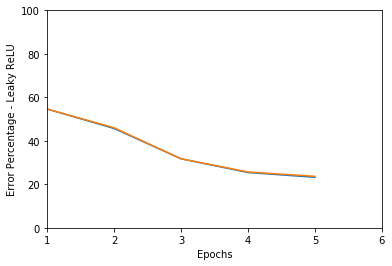

K= 2
Epoch:  1
Epoch:  2


KeyboardInterrupt: 

In [22]:
X3, y3 = getTrainSet()
indices_generator = generate_sets(X3)
model_list_leaky = []
result_list_leaky = []

i=0
for train_index, val_index in indices_generator:
    print("K=",i+1)
    x3_train = X3[train_index]
    y3_train = y3[train_index]
    x3_val = X3[val_index]
    y3_val = y3[val_index]
     
    parameters = leaky_relu_model(x3_train, y3_train, x3_val, y3_val)
    model_list_leaky.append(parameters)
    
    y3_predict = leaky_relu_prediction(parameters, x3_val)
    success_leaky = success_rate(y3_predict, y3_val)
    result_list_leaky.append(success_leaky)
    
    i += 1

for i in range(0, len(result_list)):
    print('Success rate for set', i, ' is: ', result_list[i])

## Tanh

In [ ]:
# import numpy as np

# def tanh_model(X, y):

#     W1, B1, W2, B2 = setupNN()

#     parameters = {}

#     for i in range(0, interactions):

#         # Forward propagation

#         z1 = np.dot(X, W1) + B1

#         a1 = tanh(z1)

#         z2 = np.dot(a1, W2) + B2

#         # Hypothesis
#         a2 = softmax(z2)

#         # Back propagation
#         delta3 = cross_entropy_loss(a2, y, len(X))

#         dW2 = np.dot(np.transpose(a1), delta3)
#         dB2 = np.sum(delta3, axis=0, keepdims=True)
#         dot = np.dot(delta3, np.transpose(W2))
#         deriv = tanh_derivative(z1)
#         delta2 = np.multiply(dot, deriv)

#         dW1 = np.dot(np.transpose(X), delta2)
#         dB1 = np.sum(delta2, axis=0, keepdims=True)

#         # Updating parameters

#         W1 += -learning_rate * dW1
#         B1 += -learning_rate * dB1
#         W2 += -learning_rate * dW2
#         B2 += -learning_rate * dB2

#         parameters = {'W1': W1, 'B1': B1, 'W2': W2, 'B2': B2}

#     return parameters

# def tanh_prediction(parameters, X):
#     W1, B1, W2, B2 = parameters['W1'], parameters['B1'], parameters['W2'], parameters['B2']

#     z1 = np.dot(X, W1) + B1
#     a1 = tanh(z1)
#     z2 = np.dot(a1, W2) + B2
#     a2 = softmax(z2)
    
#     return np.argmax(a2, axis=1)

In [ ]:
# X4, y4 = getTrainSet()
# indices_generator = generate_sets(X3)
# model_list_tanh = []
# result_list_tanh = []

# i=0
# for train_index, val_index in indices_generator:
#     x4_train = X4[train_index]
#     y4_train = y4[train_index]
#     x4_val = X4[val_index]
#     y4_val = y4[val_index]
     
#     parameters = leaky_relu_model(x4_train, y4_train)
#     model_list_tanh.append(parameters)
    
#     y4_predict = leaky_relu_prediction(parameters, x4_val)
#     success = success_rate(y4_predict, y4_val)
#     result_list_tanh.append(success)
    
#     i += 1

# for i in range(0, len(result_list)):
#     print('Success rate for set', i, ' is: ', result_list[i])

# Test

In [ ]:
# Xt, yt = getTestSet()

# yt_predict = insertmodelhere(insertparameters here, Xt)
# success = success_rate(yt_predict, yt)

# print('Success rate for the test set is: ', success)